In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../..")

from tools.curbd import curbd, curbd_gpu, curbd_gpu_v2
import numpy as np
import pylab
import cupy as cp

In [ ]:
sim_1000 = curbd.threeRegionSim(number_units=1000, plotSim=True, T=10)

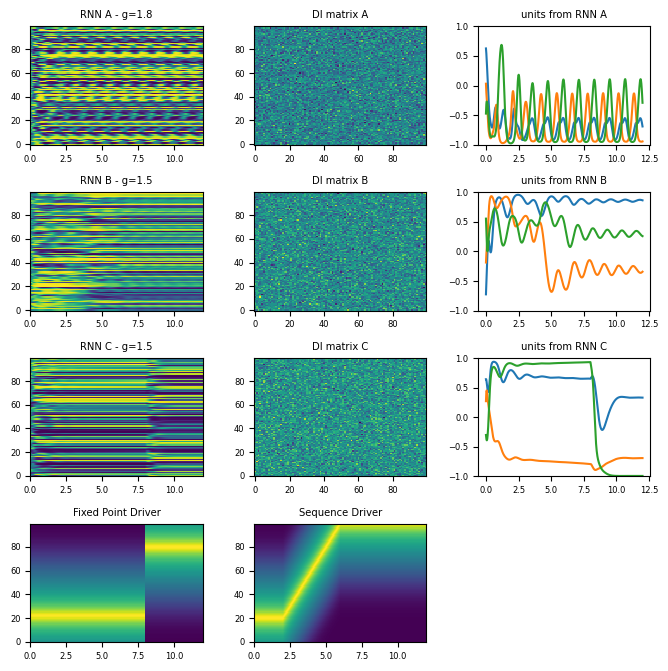

In [2]:
sim = curbd.threeRegionSim(number_units=100, plotSim=True, T=10)

In [3]:
# Stack neurons
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity.shape

(300, 1201)

In [4]:
Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


model = curbd.trainMultiRegionRNN(activity,
                                  dtData=sim['params']['dtData'],
                                  dtFactor=5,
                                  regions=regions,
                                  tauRNN=2*sim['params']['tau']/2,
                                  nRunTrain=5,
                                  verbose=True,
                                  nRunFree=5,
                                  plotStatus=False)


[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

trial=0 pVar=0.961280 chi2=19.193368
trial=1 pVar=0.986507 chi2=6.854054
trial=2 pVar=0.988980 chi2=5.501668
trial=3 pVar=0.991639 chi2=4.092034


KeyboardInterrupt: 

## Testing out own CURBD

In [3]:
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity = np.concatenate((activity[np.newaxis, :, :], activity[np.newaxis, :, :]))
activity.shape

(2, 300, 1201)

In [4]:
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity = activity[np.newaxis, :, :]


Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


gcurbd = curbd_gpu_v2.gCURBD(
    dt_data=sim['params']['dtData'],
    dt_factor=5,
    regions=regions,
    train_epochs=100
)


gcurbd.fit(activity)


trial=0 pVar=0.949987 chi2=24.312401
trial=1 pVar=0.980350 chi2=9.483488
trial=2 pVar=0.985188 chi2=6.915589
trial=3 pVar=0.987708 chi2=5.670546
trial=4 pVar=0.989768 chi2=4.548044
trial=5 pVar=0.990627 chi2=4.231946
trial=6 pVar=0.991078 chi2=3.844301
trial=7 pVar=0.992404 chi2=3.385989
trial=8 pVar=0.992460 chi2=3.166897
trial=9 pVar=0.993124 chi2=2.992305
trial=10 pVar=0.993331 chi2=2.736091
trial=11 pVar=0.993940 chi2=2.538940


KeyboardInterrupt: 

In [142]:
# Stack neurons
activity = np.concatenate((sim_1000['Ra'], sim_1000['Rb'], sim_1000['Rc']), 0)  

model = curbd.trainMultiRegionRNN(
    activity,
    dtData=sim['params']['dtData'],
    dtFactor=5,
    regions=regions,
    tauRNN=2*sim['params']['tau']/2,
    nRunTrain=100,
    verbose=True,
    nRunFree=5,
    plotStatus=False
)

KeyboardInterrupt: 

In [ ]:
import numpy as np

# Example array
arr = np.array([49.44479908])

# Get the value
value = arr[0]

print(value)
